In [ ]:
pip install umap-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import umap
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('HumanBreastCancerPatient1_cell_by_gene.csv')

print(df) 

        cell  PDK4  CCL26  CX3CL1  PGLYRP1  CD4  SNAI2  TNFRSF17  ICAM3  \
0          0   2.0    0.0     5.0      0.0  0.0    0.0       1.0    0.0   
1          1   0.0    0.0     0.0      0.0  0.0    0.0       0.0    0.0   
2          2   1.0    0.0     2.0      0.0  0.0    0.0       0.0    0.0   
3          3   0.0    0.0     4.0      0.0  0.0    0.0       1.0    0.0   
4          4   0.0    0.0     0.0      0.0  0.0    0.0       1.0    0.0   
...      ...   ...    ...     ...      ...  ...    ...       ...    ...   
61512  61512   0.0    0.0     0.0      0.0  0.0    0.0       0.0    1.0   
61513  61513   0.0    0.0     0.0      0.0  0.0    0.0       0.0    1.0   
61514  61514   0.0    0.0     1.0      0.0  0.0    0.0       1.0    1.0   
61515  61515   1.0    0.0     0.0      0.0  0.0    0.0       1.0    0.0   
61516  61516   0.0    0.0     0.0      0.0  0.0    0.0       0.0    0.0   

       TBX21  ...  Blank-41  Blank-42  Blank-43  Blank-44  Blank-45  Blank-46  \
0        0.0  ... 

In [ ]:
reducer = umap.UMAP(n_neighbors=3, min_dist=0.2)
embedding = reducer.fit_transform(df[10000:20000])

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:
k = 15  # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=k)
labels = kmeans.fit_predict(embedding)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


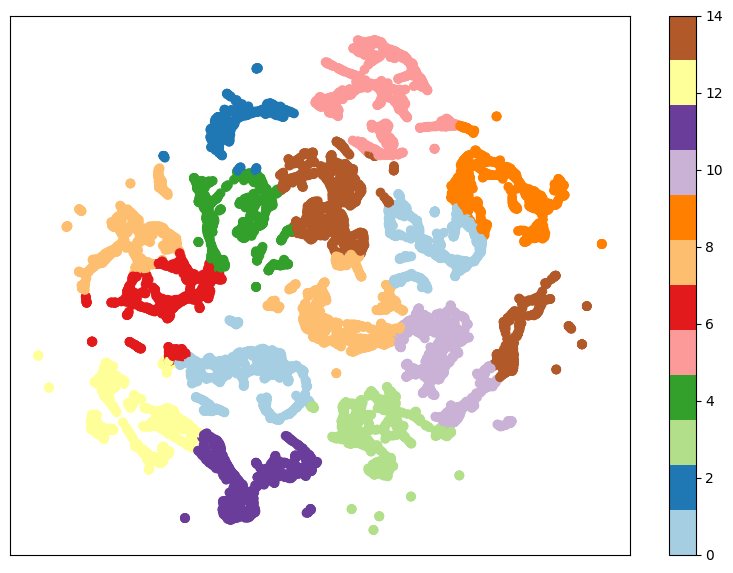

In [ ]:
# Affichage des résultats
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Paired')
plt.setp(ax, xticks=[], yticks=[])
plt.colorbar()
plt.show() 